<a href="https://colab.research.google.com/github/advadj67/hw3_M11221004/blob/main/HW03_YoloV8_Colab_%E5%8E%9F%E5%9C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!git clone https://github.com/advadj67/hw3_M11221004.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
'''
#將.xml轉成Yolo所需 .txt檔案
import os
import xml.etree.ElementTree as ET

def convert_coordinates(size, box):
    # 轉換坐標
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def convert_xml_to_yolo(xml_path, output_root, class_dict, output_folders):
    # 解析XML並轉換為YOLO格式
    tree = ET.parse(xml_path)
    root = tree.getroot()

    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for output_folder in output_folders:
        folder_name = os.path.basename(output_folder)
        output_dir = os.path.join(output_root, folder_name)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        output_file_path = os.path.join(output_dir, os.path.splitext(os.path.basename(xml_path))[0] + '.txt')
        with open(output_file_path, 'w') as f:
            for obj in root.findall('object'):
                cls = obj.find('name').text
                if cls not in class_dict:
                    continue
                cls_id = class_dict[cls]
                xml_box = obj.find('bndbox')
                box = (float(xml_box.find('xmin').text), float(xml_box.find('xmax').text),
                       float(xml_box.find('ymin').text), float(xml_box.find('ymax').text))
                bb = convert_coordinates((w,h), box)
                f.write(f"{cls_id} {' '.join([str(a) for a in bb])}\n")

# 資料夾列表
folders = ["訓練集_xml", "驗證集_xml", "測試集_xml"]
o_folders = ["train", "val", "test"]

# 分類字典，將類別名映射到整數標籤
class_dict = {"container": 0}

# 輸出根資料夾路徑
output_root = "E:\Downloads\貨櫃資料集\labels"

# 如果輸出根資料夾不存在，則創建
if not os.path.exists(output_root):
    os.makedirs(output_root)

# 迴圈處理每個資料夾
for folder, o_folder in zip(folders, o_folders):
    folder_path = os.path.join("E:\Downloads\貨櫃資料集", folder)  # 資料夾路徑
    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]  # 獲取所有XML檔案
    output_folders = [os.path.join(output_root, o_folder)]  # 輸出資料夾路徑
    for xml_file in xml_files:
        xml_path = os.path.join(folder_path, xml_file)  # XML檔案路徑
        convert_xml_to_yolo(xml_path, output_root, class_dict, output_folders)

print("labels轉換完成!")
'''

'\n#將.xml轉成Yolo所需 .txt檔案\nimport os\nimport xml.etree.ElementTree as ET\n\ndef convert_coordinates(size, box):\n    # 轉換坐標\n    dw = 1.0 / size[0]\n    dh = 1.0 / size[1]\n    x = (box[0] + box[1]) / 2.0\n    y = (box[2] + box[3]) / 2.0\n    w = box[1] - box[0]\n    h = box[3] - box[2]\n    x = x * dw\n    w = w * dw\n    y = y * dh\n    h = h * dh\n    return (x, y, w, h)\n\ndef convert_xml_to_yolo(xml_path, output_root, class_dict, output_folders):\n    # 解析XML並轉換為YOLO格式\n    tree = ET.parse(xml_path)\n    root = tree.getroot()\n\n    size = root.find(\'size\')\n    w = int(size.find(\'width\').text)\n    h = int(size.find(\'height\').text)\n\n    for output_folder in output_folders:\n        folder_name = os.path.basename(output_folder)\n        output_dir = os.path.join(output_root, folder_name)\n        if not os.path.exists(output_dir):\n            os.makedirs(output_dir)\n\n        output_file_path = os.path.join(output_dir, os.path.splitext(os.path.basename(xml_path))[0] + \'.

In [3]:
'''
from PIL import Image

# 資料夾列表
folder_path = "E:/Downloads/貨櫃資料集/"
folders = [folder_path + "訓練集", folder_path + "驗證集", folder_path + "測試集"]

output_folders = [folder_path + "images/train", folder_path + "images/val", folder_path + "images/test"]


# 創建輸出資料夾
for output_folder in output_folders:
    os.makedirs(output_folder, exist_ok=True)

# 轉換函數
def resize_images(folder, output_folder):
    # 獲取資料夾中所有圖片的檔案名稱
    files = os.listdir(folder)

    # 迴圈處理每張圖片
    for file in files:
        # 檔案路徑
        file_path = os.path.join(folder, file)

        # 如果是檔案
        if os.path.isfile(file_path):
            # 打開圖片
            img = Image.open(file_path)

            # 重新調整大小
            resized_img = img.resize((416, 416))

            # 另存新圖片
            resized_img.save(os.path.join(output_folder, file))

# 對每個資料夾和對應的輸出資料夾調用resize_images函數
for folder, output_folder in zip(folders, output_folders):
    resize_images(folder, output_folder)

print("images轉換完成!")
'''

'\nfrom PIL import Image\n\n# 資料夾列表\nfolder_path = "E:/Downloads/貨櫃資料集/"\nfolders = [folder_path + "訓練集", folder_path + "驗證集", folder_path + "測試集"]\n\noutput_folders = [folder_path + "images/train", folder_path + "images/val", folder_path + "images/test"]\n\n\n# 創建輸出資料夾\nfor output_folder in output_folders:\n    os.makedirs(output_folder, exist_ok=True)\n\n# 轉換函數\ndef resize_images(folder, output_folder):\n    # 獲取資料夾中所有圖片的檔案名稱\n    files = os.listdir(folder)\n\n    # 迴圈處理每張圖片\n    for file in files:\n        # 檔案路徑\n        file_path = os.path.join(folder, file)\n\n        # 如果是檔案\n        if os.path.isfile(file_path):\n            # 打開圖片\n            img = Image.open(file_path)\n\n            # 重新調整大小\n            resized_img = img.resize((416, 416))\n\n            # 另存新圖片\n            resized_img.save(os.path.join(output_folder, file))\n\n# 對每個資料夾和對應的輸出資料夾調用resize_images函數\nfor folder, output_folder in zip(folders, output_folders):\n    resize_images(folder, output_folder)\n\nprint(

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/hw3_M11221004/貨櫃資料集/data.yaml', epochs=5, batch=8, imgsz=(416,416))

model.val()  # It'll automatically evaluate the data you trained.

100%|██████████| 6.23M/6.23M [00:00<00:00, 66.6MB/s]


Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/hw3_M11221004/貨櫃資料集/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=(416, 416), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

100%|██████████| 755k/755k [00:00<00:00, 16.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/hw3_M11221004/貨櫃資料集/labels/train... 2125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2125/2125 [00:01<00:00, 2021.09it/s]

train: New cache created: /content/hw3_M11221004/貨櫃資料集/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/hw3_M11221004/貨櫃資料集/labels/val... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<00:00, 1320.38it/s]

val: New cache created: /content/hw3_M11221004/貨櫃資料集/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.721G        1.2      1.783      1.038          5        416: 100%|██████████| 266/266 [00:44<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  5.65it/s]

                   all        536        536      0.997      0.993      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.652G     0.8368     0.7628     0.9054          3        416: 100%|██████████| 266/266 [00:40<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.67it/s]


                   all        536        536          1          1      0.995      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.663G     0.7834     0.5876     0.8895          8        416: 100%|██████████| 266/266 [00:38<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.22it/s]

                   all        536        536          1          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.656G      0.729     0.4976     0.8708          7        416: 100%|██████████| 266/266 [00:37<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.11it/s]

                   all        536        536          1          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.656G     0.6577     0.4331     0.8516          6        416: 100%|██████████| 266/266 [00:37<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.20it/s]

                   all        536        536          1          1      0.995       0.85



5 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]


                   all        536        536          1          1      0.995       0.85
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/hw3_M11221004/貨櫃資料集/labels/val.cache... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:04<00:00, 13.52it/s]


                   all        536        536          1          1      0.995      0.849
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e613f1c0070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [5]:
# 將預測框存成txt檔

import os

# 定義圖片檔案目錄路徑
source_directory = '/content/hw3_M11221004/貨櫃資料集/測試集'

# 指定儲存目錄
save_directory = '/content/predictions/'

# 預測整個目錄
results = model.predict(source=source_directory, save=True)

# 轉換預測框格式
pred_boxes_for_iou = []
for result in results:
    # Access the path attribute from the Result object
    image_path = result.path
    image_id = os.path.splitext(os.path.basename(image_path))[0]
    boxes = [{'class_index': box.cls.item(), 'coordinates': [box.xyxy[0], box.xyxy[1], box.xyxy[2], box.xyxy[3]] if len(box.xyxy) == 4 else [box.xyxy[0][0], box.xyxy[0][1], box.xyxy[0][2], box.xyxy[0][3]]} for box in result.boxes]
    #print("Box coordinates:", [box.xyxy for box in result.boxes])  # 新增的程式碼，輸出 box.xyxy 的值
    pred_boxes_for_iou.append({'image_id': image_id, 'boxes': boxes})


# 將預測結果保存到 TXT 文件
with open('pred_boxes_for_iou.txt', 'w') as txtfile:
    for prediction in pred_boxes_for_iou:
        image_id = prediction['image_id']
        for box in prediction['boxes']:
            class_index = box['class_index']
            x_min, y_min, x_max, y_max = box['coordinates']
            txtfile.write(f"{image_id} {class_index} {x_min} {y_min} {x_max} {y_max}\n")

print("預測框已保存到文件中")


image 1/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0001.jpg: 256x416 2 container numbers, 152.6ms
image 2/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0002.jpg: 256x416 2 container numbers, 12.4ms
image 3/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0003.jpg: 256x416 2 container numbers, 14.1ms
image 4/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0004.jpg: 256x416 2 container numbers, 13.1ms
image 5/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0005.jpg: 256x416 2 container numbers, 13.2ms
image 6/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0006.jpg: 256x416 1 container number, 12.8ms
image 7/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0007.jpg: 256x416 1 container number, 12.8ms
image 8/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0008.jpg: 256x416 1 container number, 14.5ms
image 9/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0009.jpg: 256x416 1 container number, 13.5ms
image 10/755 /content/hw3_M11221004/貨櫃資料集/測試集/image_0010.jpg: 256x416 1 container number, 16.5ms
image 11/755 /content/hw3_M11221

In [6]:
# 將重複預測框使用NMS去除
import os
import numpy as np

def non_max_suppression(boxes, threshold):
    # 如果沒有預測框，則返回空列表
    if len(boxes) == 0:
        return []

    # 將預測框轉換為NumPy陣列
    boxes = np.array(boxes)

    # 提取預測框的座標和分數
    x1 = boxes[:, 0].astype(float)
    y1 = boxes[:, 1].astype(float)
    x2 = boxes[:, 2].astype(float)
    y2 = boxes[:, 3].astype(float)
    scores = boxes[:, 4].astype(float)

    # 計算每個預測框的面積
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)

    # 根據分數降序排列預測框的索引
    order = scores.argsort()[::-1]

    # 保留的預測框列表
    keep = []

    # 遍歷排序後的預測框索引
    while order.size > 0:
        # 取出分數最高的預測框
        i = order[0]
        keep.append(i)

        # 計算重疊區域的左上角和右下角座標
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        # 計算重疊區域的寬度和高度
        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)

        # 計算重疊區域的面積
        intersection = w * h

        # 計算IoU（重疊區域面積除以聯合區域面積）
        iou = intersection / (areas[i] + areas[order[1:]] - intersection)

        # 找到IoU小於閾值的預測框索引
        inds = np.where(iou <= threshold)[0]

        # 更新排序後的預測框索引
        order = order[inds + 1]

    # 返回保留的預測框索引
    return keep

# 將圖像名稱相同的預測框進行NMS處理
def apply_nms(boxes_by_image, threshold):
    # 新的預測框列表
    nms_boxes_by_image = {}

    # 遍歷每個圖像名稱
    for img_name, boxes in boxes_by_image.items():
        # 如果圖像名稱相同的預測框數量大於1，則進行NMS處理
        if len(boxes) > 1:
            # 複製預測框列表以便修改
            temp_boxes = boxes.copy()
            # 使用NMS保留一個預測框
            keep_indices = non_max_suppression(temp_boxes, threshold)
            # 更新新的預測框列表
            nms_boxes_by_image[img_name] = [boxes[i] for i in keep_indices]
        else:
            # 如果圖像名稱相同的預測框數量為1，則保留原始預測框
            nms_boxes_by_image[img_name] = boxes

    return nms_boxes_by_image

# 將預測框按圖像名稱分組
def group_boxes_by_image(boxes):
    boxes_by_image = {}
    for box in boxes:
        img_name = box[0]
        if img_name not in boxes_by_image:
            boxes_by_image[img_name] = []
        boxes_by_image[img_name].append(box[1:])
    return boxes_by_image

# 讀取預測框
def read_prediction_boxes_from_txt(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 6:
            continue  # 忽略不完整的行
        img_name = parts[0]
        score = float(parts[-1])
        x1, y1, x2, y2 = map(float, parts[-5:-1])
        boxes.append((img_name, x1, y1, x2, y2, score))
    return boxes

# 保存預測框到TXT文件
def save_boxes_to_txt(boxes_by_image, file_path):
    with open(file_path, 'w') as f:
        for img_name, img_boxes in boxes_by_image.items():
            for box in img_boxes:
                x1, y1, x2, y2, score = box
                f.write(f"{img_name} {x1} {y1} {x2} {y2} {score}\n")

# 讀取預測框
prediction_boxes = read_prediction_boxes_from_txt('/content/pred_boxes_for_iou.txt')

# 將預測框按圖像名稱分組
boxes_by_image = group_boxes_by_image(prediction_boxes)

# 將圖像名稱相同的預測框進行NMS處理，閾值設置為0.5
nms_boxes_by_image = apply_nms(boxes_by_image, threshold=0.2)

# 保存最終預測框到新的txt檔案中
save_boxes_to_txt(nms_boxes_by_image, 're_pred_boxes_for_iou.txt')


In [7]:
# 將無預測框填入0 0 0 0
def read_coordinates(file_path):
    coordinates = {}
    with open(file_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 6:
            continue
        img_name = parts[0]
        score = float(parts[-1])
        x1, y1, x2, y2 = map(float, parts[-5:-1])
        coordinates[img_name] = (x1, y1, x2, y2, score)
    return coordinates

def fill_missing_coordinates(coordinates):
    for i in range(1, 756):
        img_name = f'image_{i:04d}'
        if img_name not in coordinates:
            coordinates[img_name] = (0.0, 0, 0, 0, 0)

def save_coordinates_to_txt(coordinates, file_path):
    with open(file_path, 'w') as f:
        for img_name, coords in sorted(coordinates.items()):
            x1, y1, x2, y2, score = coords
            f.write(f"{img_name} {x1} {y1} {x2} {y2} {score}\n")

coordinates = read_coordinates('/content/re_pred_boxes_for_iou.txt')
fill_missing_coordinates(coordinates)

# 按照編號順序排列座標並打印
for i in range(1, 756):
    img_name = f'image_{i:04d}'
    coords = coordinates.get(img_name, (0, 0, 0, 0, 0))
    print(f"{img_name}: {coords}")

# 保存座標至新的 txt 檔案
save_coordinates_to_txt(coordinates, 'new_pred_boxes_for_iou.txt')

image_0001: (0.0, 758.1954956054688, 100.87065124511719, 1091.310546875, 246.08853149414062)
image_0002: (0.0, 929.8981323242188, 152.62306213378906, 1144.881591796875, 300.86749267578125)
image_0003: (0.0, 789.4627685546875, 143.74716186523438, 1140.0401611328125, 301.548095703125)
image_0004: (0.0, 791.225341796875, 87.98270416259766, 1089.733154296875, 220.07005310058594)
image_0005: (0.0, 825.1907348632812, 32.8614616394043, 1085.004638671875, 145.74493408203125)
image_0006: (0.0, 863.373046875, 0.0, 1066.88720703125, 90.57084655761719)
image_0007: (0.0, 820.008056640625, 8.563847541809082, 977.791015625, 100.81593322753906)
image_0008: (0.0, 812.64013671875, 19.86201286315918, 983.2197875976562, 113.11243438720703)
image_0009: (0.0, 811.0501708984375, 26.797502517700195, 1003.6689453125, 132.20745849609375)
image_0010: (0.0, 864.7579956054688, 0.0, 1016.2769165039062, 72.69554901123047)
image_0011: (0.0, 745.2138061523438, 14.678050994873047, 931.1380004882812, 113.57701110839844)

In [8]:
# 檢查每個圖片是否只有一個預測框
import os

# 讀取預測框
def read_prediction_boxes_from_txt(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 6:
            continue  # 忽略不完整的行
        img_name = parts[0]
        score = float(parts[-1])
        x1, y1, x2, y2 = map(float, parts[-5:-1])
        boxes.append((img_name, x1, y1, x2, y2, score))
    return boxes

# 確保每個圖片只有一個預測框
def ensure_single_prediction_per_image(prediction_boxes):
    unique_image_names = set()
    single_prediction_boxes = []
    for box in prediction_boxes:
        img_name = box[0]
        if img_name not in unique_image_names:
            single_prediction_boxes.append(box)
            unique_image_names.add(img_name)
    return single_prediction_boxes

# 讀取預測框
prediction_boxes = read_prediction_boxes_from_txt('/content/new_pred_boxes_for_iou.txt')

# 確保每個圖片只有一個預測框
single_prediction_boxes = ensure_single_prediction_per_image(prediction_boxes)

# 打印結果
print(f"原始預測框數量: {len(prediction_boxes)}")
print(f"確保每個圖片只有一個預測框後的預測框數量: {len(single_prediction_boxes)}")


原始預測框數量: 755
確保每個圖片只有一個預測框後的預測框數量: 755


In [9]:
# 真實框載入以及存成txt

import os
from PIL import Image

def get_image_resolution(image_path):
    with Image.open(image_path) as img:
        return img.size  # 返回 (width, height)

def read_true_boxes(labels_directory, images_directory):
    true_boxes = {}
    for label_file in os.listdir(labels_directory):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_directory, label_file), 'r') as f:
                lines = f.readlines()
            boxes = []
            image_id = os.path.splitext(label_file)[0]
            image_path = os.path.join(images_directory, image_id + ".jpg")  # 假設影像文件格式為.jpg
            image_width, image_height = get_image_resolution(image_path)
            for line in lines:
                parts = line.strip().split()
                class_index = int(parts[0])
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])
                # 計算左上角和右下角坐標
                x1 = int((x_center - width / 2) * image_width)
                y1 = int((y_center - height / 2) * image_height)
                x2 = int((x_center + width / 2) * image_width)
                y2 = int((y_center + height / 2) * image_height)
                boxes.append({'class_index': class_index, 'coordinates': [x1, y1, x2, y2]})
            true_boxes[image_id] = boxes
    return true_boxes

# 真實框的資料夾路徑
labels_directory = '/content/hw3_M11221004/貨櫃資料集/labels/test'
# 影像的資料夾路徑
images_directory = '/content/hw3_M11221004/貨櫃資料集/測試集'

# 讀取真實框
true_boxes = read_true_boxes(labels_directory, images_directory)

# 將真實框轉換成易於計算 IoU 的格式
true_boxes_for_iou = [{'image_id': image_id, 'boxes': boxes} for image_id, boxes in true_boxes.items()]

# 按照影像序號排序真實框
true_boxes_for_iou.sort(key=lambda x: int(x['image_id'].split('_')[-1]))

# 將真實框保存到 TXT 文件
with open('true_boxes_for_iou.txt', 'w') as txtfile:
    for true_box in true_boxes_for_iou:
        image_id = true_box['image_id']
        for box in true_box['boxes']:
            class_index = box['class_index']
            x_min, y_min, x_max, y_max = box['coordinates']
            txtfile.write(f"{image_id} {class_index} {x_min} {y_min} {x_max} {y_max}\n")

print("真實框轉換完成")


真實框轉換完成


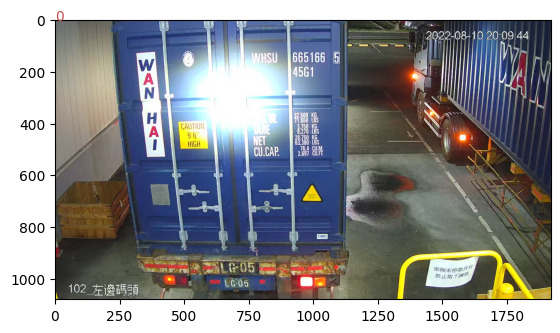

In [10]:
'''
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def get_image_resolution(image_path):
    with Image.open(image_path) as img:
        return img.size  # 返回 (width, height)

def read_true_boxes(labels_directory):
    true_boxes = {}
    for label_file in os.listdir(labels_directory):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_directory, label_file), 'r') as f:
                lines = f.readlines()
            boxes = []
            image_id = os.path.splitext(label_file)[0]
            for line in lines:
                parts = line.strip().split()
                class_index = int(parts[0])
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])
                boxes.append({
                    'class_index': class_index,
                    'x_center': x_center,
                    'y_center': y_center,
                    'width': width,
                    'height': height
                })
            true_boxes[image_id] = boxes
    return true_boxes

def draw_boxes_on_image(image_path, boxes):
    # 顯示影像
    fig, ax = plt.subplots()
    ax.imshow(plt.imread(image_path))

    # 繪製框和類別
    for box in boxes:
        class_index = box['class_index']
        x_center = box['x_center']
        y_center = box['y_center']
        width = box['width']
        height = box['height']
        x1 = x_center - width / 2
        y1 = y_center - height / 2
        rect = Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1, str(class_index), color='r')

    plt.show()

# 真實框的資料夾路徑
labels_directory = '/content/hw3_M11221004/貨櫃資料集/labels/test'
# 影像的資料夾路徑
images_directory = '/content/hw3_M11221004/貨櫃資料集/測試集'

# 讀取真實框
true_boxes = read_true_boxes(labels_directory)

# 指定要繪製的影像ID
image_id = 'image_0001'
image_path = os.path.join(images_directory, image_id + ".jpg")

# 從true_boxes獲取該影像的框
boxes = true_boxes.get(image_id, [])

# 在影像上繪製框
draw_boxes_on_image(image_path, boxes)
'''

In [11]:
# 定義讀取函數來讀取框的座標

import os

# 定義解析函數
def read_boxes_from_txt(file_path):
    boxes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            image_id = parts[0]
            class_index = int(float(parts[1]))  # 轉換為整數
            x_min = float(parts[2])
            y_min = float(parts[3])
            x_max = float(parts[4])
            y_max = float(parts[5])
            boxes.append({'image_id': image_id, 'class_index': class_index, 'coordinates': [x_min, y_min, x_max, y_max]})
    return boxes

# 讀取真實框和預測框的文件路徑
true_boxes_file = 'true_boxes_for_iou.txt'
pred_boxes_file = '/content/new_pred_boxes_for_iou.txt'

# 讀取真實框和預測框
true_boxes = read_boxes_from_txt(true_boxes_file)
pred_boxes = read_boxes_from_txt(pred_boxes_file)

# 列印第一個真實框和預測框來確認格式是否正確
if true_boxes:
    print("第一個真實框:", true_boxes[0])
if pred_boxes:
    print("第一個預測框:", pred_boxes[0])


第一個真實框: {'image_id': 'image_0001', 'class_index': 0, 'coordinates': [743.0, 114.0, 1110.0, 238.0]}
第一個預測框: {'image_id': 'image_0001', 'class_index': 0, 'coordinates': [758.1954956054688, 100.87065124511719, 1091.310546875, 246.08853149414062]}


In [12]:
# 計算IoU 與 讀取真實框、預測框座標文件

def calculate_iou(box1, box2):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area != 0 else 0

# 讀取預測框和真實框的文件
def read_boxes_from_txt(file_path):
    boxes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            image_id = parts[0]
            class_index = int(float(parts[1]))  # 轉換為整數
            x_min = float(parts[2])
            y_min = float(parts[3])
            x_max = float(parts[4])
            y_max = float(parts[5])
            boxes.append({'image_id': image_id, 'class_index': class_index, 'coordinates': [x_min, y_min, x_max, y_max]})
    return boxes

# 讀取真實框和預測框
true_boxes_file = 'true_boxes_for_iou.txt'
pred_boxes_file = 'new_pred_boxes_for_iou.txt'

true_boxes = read_boxes_from_txt(true_boxes_file)
pred_boxes = read_boxes_from_txt(pred_boxes_file)

# 打印一些样本数据进行检查
print("Sample true boxes:")
for i in range(5):
    print(true_boxes[i])

print("\nSample prediction boxes:")
for i in range(5):
    print(pred_boxes[i])


Sample true boxes:
{'image_id': 'image_0001', 'class_index': 0, 'coordinates': [743.0, 114.0, 1110.0, 238.0]}
{'image_id': 'image_0002', 'class_index': 0, 'coordinates': [739.0, 158.0, 1160.0, 302.0]}
{'image_id': 'image_0003', 'class_index': 0, 'coordinates': [728.0, 155.0, 1159.0, 294.0]}
{'image_id': 'image_0004', 'class_index': 0, 'coordinates': [784.0, 98.0, 1128.0, 211.0]}
{'image_id': 'image_0005', 'class_index': 0, 'coordinates': [820.0, 38.0, 1097.0, 136.0]}

Sample prediction boxes:
{'image_id': 'image_0001', 'class_index': 0, 'coordinates': [758.1954956054688, 100.87065124511719, 1091.310546875, 246.08853149414062]}
{'image_id': 'image_0002', 'class_index': 0, 'coordinates': [929.8981323242188, 152.62306213378906, 1144.881591796875, 300.86749267578125]}
{'image_id': 'image_0003', 'class_index': 0, 'coordinates': [789.4627685546875, 143.74716186523438, 1140.0401611328125, 301.548095703125]}
{'image_id': 'image_0004', 'class_index': 0, 'coordinates': [791.225341796875, 87.9827

In [13]:
# 計算績效指標


# 初始化統計變量
TP = 0
FP = 0
FN = 0
total_iou = 0
total_predictions = 0
iou_threshold = 0.7  # IoU 大於 0.7 才算正樣本

for prediction in pred_boxes:
    image_id = prediction['image_id']
    pred_boxes_for_image = [box for box in pred_boxes if box['image_id'] == image_id]
    true_boxes_for_image = [box for box in true_boxes if box['image_id'] == image_id]
    true_boxes_coordinates = [box['coordinates'] for box in true_boxes_for_image]

    matched_true_boxes = set()

    for pred_box in pred_boxes_for_image:
        pred_coordinates = pred_box['coordinates']
        max_iou = 0
        is_TP = False

        for true_box_index, true_coordinates in enumerate(true_boxes_coordinates):
            iou = calculate_iou(pred_coordinates, true_coordinates)
            max_iou = max(max_iou, iou)

            if iou >= iou_threshold and true_box_index not in matched_true_boxes:
                TP += 1
                is_TP = True
                matched_true_boxes.add(true_box_index)
                break

        total_iou += max_iou
        if not is_TP:
            FP += 1

    total_predictions += len(pred_boxes_for_image)
    FN += len(true_boxes_coordinates) - len(matched_true_boxes)

# 計算 Precision、Recall、F1-score、mAP
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
mAP = total_iou / total_predictions if total_predictions > 0 else 0

# 打印所有指標的值
print("TP:", TP)
print("FP:", FP)
print("FN:", FN)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("mAP:", mAP)


TP: 688
FP: 67
FN: 67
Precision: 0.9112582781456954
Recall: 0.9112582781456954
F1 Score: 0.9112582781456954
mAP: 0.770248576366652


## 文字辨識OCR

In [17]:
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [18]:
# 讀取預測框與預測後圖片檔
def read_bounding_boxes(file_path):
    bounding_boxes = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            image_name = parts[0]
            bbox = list(map(float, parts[1:]))
            bounding_boxes[image_name] = bbox
    return bounding_boxes

def check_filenames(bounding_boxes, image_folder):
    for image_name in bounding_boxes.keys():
        image_file_name = image_name + ".jpg"  # 假設圖片副檔名是 .jpg，根據實際情況調整
        image_path = os.path.join(image_folder, image_file_name)
        if not os.path.exists(image_path):
            print(f"Image {image_file_name} not found in {image_folder}")
        else:
            print(f"Image {image_file_name} found and verified")

if __name__ == "__main__":
    # 指定預測框資料檔的路徑
    bbox_file_path = '/content/new_pred_boxes_for_iou.txt'

    # 指定預測後圖片的資料夾路徑 (需修改成預測後圖片路徑)
    image_folder = '/content/hw3_M11221004/貨櫃資料集/測試集'

    # 讀取預測框資料
    bounding_boxes = read_bounding_boxes(bbox_file_path)

    # 檢查檔名對應
    check_filenames(bounding_boxes, image_folder)


Image image_0001.jpg found and verified
Image image_0002.jpg found and verified
Image image_0003.jpg found and verified
Image image_0004.jpg found and verified
Image image_0005.jpg found and verified
Image image_0006.jpg found and verified
Image image_0007.jpg found and verified
Image image_0008.jpg found and verified
Image image_0009.jpg found and verified
Image image_0010.jpg found and verified
Image image_0011.jpg found and verified
Image image_0012.jpg found and verified
Image image_0013.jpg found and verified
Image image_0014.jpg found and verified
Image image_0015.jpg found and verified
Image image_0016.jpg found and verified
Image image_0017.jpg found and verified
Image image_0018.jpg found and verified
Image image_0019.jpg found and verified
Image image_0020.jpg found and verified
Image image_0021.jpg found and verified
Image image_0022.jpg found and verified
Image image_0023.jpg found and verified
Image image_0024.jpg found and verified
Image image_0025.jpg found and verified


In [19]:
# 裁切圖片並保存
from PIL import Image
import os

def load_image(image_path):
    return Image.open(image_path)

def crop_image_with_bbox(image_path, bbox, save_folder):
    image = load_image(image_path)

    # 解析預測框
    x1, y1, x2, y2 = bbox[1], bbox[2], bbox[3], bbox[4]

    # 檢查預測框座標是否為0 0 0 0，如果是則跳過
    if x1 == 0 and y1 == 0 and x2 == 0 and y2 == 0:
        print(f"Skipping image {os.path.basename(image_path)} as bounding box coordinates are all zeros.")
        return None

    # 裁切圖片
    cropped_image = image.crop((x1, y1, x2, y2))

    # 確保保存資料夾存在
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    # 取得原始檔名
    base_name = os.path.basename(image_path)

    # 保存裁切後的圖片，使用原始檔名
    cropped_image_path = os.path.join(save_folder, base_name)
    cropped_image.save(cropped_image_path)
    print(f"Cropped image saved at {cropped_image_path}")

    return cropped_image_path

if __name__ == "__main__":
    # 指定預測框資料檔的路徑
    bbox_file_path = '/content/new_pred_boxes_for_iou.txt'

    # 指定預測後圖片的資料夾路徑
    image_folder = '/content/hw3_M11221004/貨櫃資料集/測試集'

    # 指定裁切後圖片的保存資料夾
    cropped_image_folder = '/content/crop_images'

    # 讀取預測框資料
    bounding_boxes = read_bounding_boxes(bbox_file_path)

    cropped_image_paths = []

    # 檢查檔名對應並裁切圖片
    for image_name in bounding_boxes.keys():
        image_file_name = image_name + ".jpg"  # 假設圖片副檔名是 .jpg，根據實際情況調整
        image_path = os.path.join(image_folder, image_file_name)
        if not os.path.exists(image_path):
            print(f"Image {image_file_name} not found in {image_folder}")
        else:
            print(f"Image {image_file_name} found and verified")

            # 裁切圖片並保存
            cropped_image_path = crop_image_with_bbox(image_path, bounding_boxes[image_name], cropped_image_folder)
            if cropped_image_path:
                cropped_image_paths.append(cropped_image_path)

    # 列印裁切後的所有圖片路徑
    print("Cropped image paths:")
    for path in cropped_image_paths:
        print(path)


Image image_0001.jpg found and verified
Cropped image saved at /content/crop_images/image_0001.jpg
Image image_0002.jpg found and verified
Cropped image saved at /content/crop_images/image_0002.jpg
Image image_0003.jpg found and verified
Cropped image saved at /content/crop_images/image_0003.jpg
Image image_0004.jpg found and verified
Cropped image saved at /content/crop_images/image_0004.jpg
Image image_0005.jpg found and verified
Cropped image saved at /content/crop_images/image_0005.jpg
Image image_0006.jpg found and verified
Cropped image saved at /content/crop_images/image_0006.jpg
Image image_0007.jpg found and verified
Cropped image saved at /content/crop_images/image_0007.jpg
Image image_0008.jpg found and verified
Cropped image saved at /content/crop_images/image_0008.jpg
Image image_0009.jpg found and verified
Cropped image saved at /content/crop_images/image_0009.jpg
Image image_0010.jpg found and verified
Cropped image saved at /content/crop_images/image_0010.jpg
Image imag

In [20]:
# 將圖片二值化
import cv2
import os

def binarize_image(image_path, save_folder):
    # 讀取圖片
    image = cv2.imread(image_path)

    # 將圖片轉換為灰度模式
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 使用大津法計算閾值（稍微調高一些）
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # 反轉二值化圖片，將背景設置為白色，文字設置為黑色
    inverted_image = cv2.bitwise_not(binary_image)

    # 確保保存資料夾存在
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    # 取得原始檔名
    base_name = os.path.basename(image_path)

    # 組合儲存路徑
    adjusted_image_path = os.path.join(save_folder, base_name)

    # 儲存調整後的圖片
    cv2.imwrite(adjusted_image_path, inverted_image)
    print(f"Adjusted image saved at {adjusted_image_path}")

    return adjusted_image_path

# 指定裁切後圖片的資料夾路徑
cropped_image_folder = '/content/crop_images'

# 指定調整後圖片的保存資料夾
adjusted_image_folder = '/content/adjust_images'

# 檢查裁切後的所有圖片
for root, dirs, files in os.walk(cropped_image_folder):
    for file in files:
        # 裁切後圖片的完整路徑
        cropped_image_path = os.path.join(root, file)

        # 進行大津法計算閾值並反轉二值化處理並保存
        adjusted_image_path = binarize_image(cropped_image_path, adjusted_image_folder)


Adjusted image saved at /content/adjust_images/image_0375.jpg
Adjusted image saved at /content/adjust_images/image_0629.jpg
Adjusted image saved at /content/adjust_images/image_0167.jpg
Adjusted image saved at /content/adjust_images/image_0608.jpg
Adjusted image saved at /content/adjust_images/image_0082.jpg
Adjusted image saved at /content/adjust_images/image_0624.jpg
Adjusted image saved at /content/adjust_images/image_0670.jpg
Adjusted image saved at /content/adjust_images/image_0731.jpg
Adjusted image saved at /content/adjust_images/image_0331.jpg
Adjusted image saved at /content/adjust_images/image_0179.jpg
Adjusted image saved at /content/adjust_images/image_0070.jpg
Adjusted image saved at /content/adjust_images/image_0636.jpg
Adjusted image saved at /content/adjust_images/image_0610.jpg
Adjusted image saved at /content/adjust_images/image_0224.jpg
Adjusted image saved at /content/adjust_images/image_0036.jpg
Adjusted image saved at /content/adjust_images/image_0643.jpg
Adjusted

In [21]:
# 進行文字辨識
import os
import re
import pytesseract
from PIL import Image

# 圖片路徑
image_path = "/content/adjust_images"

# 取得路徑下所有圖片檔案名稱
image_files = [f for f in os.listdir(image_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 文字辨識函式
def image_to_text(image_file):
    # 使用Pillow套件打開圖片
    with Image.open(os.path.join(image_path, image_file)) as img:
        # 將圖片轉換成文字
        text = pytesseract.image_to_string(img, lang='eng')  # 設定辨識語言，這裡是英文

        # 使用正則表達式過濾出英文字母和數字
        filtered_text = re.sub(r'[^A-Za-z0-9]', '', text)
        return filtered_text

# 將每張圖片進行文字辨識
for image_file in image_files:
    text = image_to_text(image_file)
    print(f"Filtered text result for {image_file}:")
    print(text)


Filtered text result for image_0375.jpg:
WHSUf6iB7I2det
Filtered text result for image_0629.jpg:
SEKU6028868abGY
Filtered text result for image_0167.jpg:
TONY62461264561
Filtered text result for image_0608.jpg:
SeKU6026456
Filtered text result for image_0082.jpg:
Ss5042074561
Filtered text result for image_0624.jpg:
sexufenesaegscl
Filtered text result for image_0670.jpg:
WHSU04014561
Filtered text result for image_0731.jpg:
WHSU5G
Filtered text result for image_0331.jpg:
TRHU89274624561
Filtered text result for image_0179.jpg:
JENU624612t4561
Filtered text result for image_0070.jpg:
SEKU5877494561
Filtered text result for image_0636.jpg:
wastfesaaz3400
Filtered text result for image_0610.jpg:
soxfoaaaaeast
Filtered text result for image_0224.jpg:
WHSU65673874561
Filtered text result for image_0036.jpg:
WHSU93881884601
Filtered text result for image_0643.jpg:
wisafrownbss
Filtered text result for image_0080.jpg:
SEKU587749114561
Filtered text result for image_0098.jpg:
AWaSU5628589ASG


### **缺乏：**


2. 準確率績效公式: 辨識正確筆數/測試資料筆數
4. 影片的








**遇到UTF-8錯誤**

In [22]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

**下載資料夾**

In [26]:
#壓縮成資料夾下載，前面是檔名.zip，後面是要被壓縮的東西
!zip -r /content/crop_images.zip /content/crop_images

from google.colab import files
files.download("/content/crop_images.zip")

  adding: content/crop_images/ (stored 0%)
  adding: content/crop_images/image_0375.jpg (deflated 6%)
  adding: content/crop_images/image_0629.jpg (deflated 12%)
  adding: content/crop_images/image_0167.jpg (deflated 9%)
  adding: content/crop_images/image_0608.jpg (deflated 10%)
  adding: content/crop_images/image_0082.jpg (deflated 5%)
  adding: content/crop_images/image_0624.jpg (deflated 13%)
  adding: content/crop_images/image_0670.jpg (deflated 11%)
  adding: content/crop_images/image_0731.jpg (deflated 10%)
  adding: content/crop_images/image_0331.jpg (deflated 8%)
  adding: content/crop_images/image_0179.jpg (deflated 7%)
  adding: content/crop_images/image_0070.jpg (deflated 5%)
  adding: content/crop_images/image_0636.jpg (deflated 13%)
  adding: content/crop_images/image_0610.jpg (deflated 13%)
  adding: content/crop_images/image_0224.jpg (deflated 10%)
  adding: content/crop_images/image_0036.jpg (deflated 12%)
  adding: content/crop_images/image_0643.jpg (deflated 14%)
  a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 刪除資料夾
import shutil

def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder {folder_path} and its contents deleted successfully.")
    except FileNotFoundError:
        print(f"Folder {folder_path} not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# 指定要刪除的資料夾路徑
folder_to_delete = '/content/adjust_images'

# 呼叫函式來刪除資料夾
delete_folder(folder_to_delete)
